In [7]:
import torch

if torch.cuda.is_available():
    print("GPU is available:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")


GPU is available: Tesla T4


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Give proper permissions (very important, otherwise Kaggle API won’t work)
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip cat-and-dog.zip -d cat_dog_dataset


Streaming output truncated to the last 5000 lines.
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat_dog_dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat_dog_dataset/training_set/training

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [14]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/cat_dog_dataset/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/cat_dog_dataset/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [13]:
# Normalize

def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [25]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 121ms/step - accuracy: 0.5512 - loss: 4.1832 - val_accuracy: 0.5383 - val_loss: 0.7789
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.5775 - loss: 0.8647 - val_accuracy: 0.5235 - val_loss: 0.7343
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.6299 - loss: 0.6889 - val_accuracy: 0.7079 - val_loss: 0.5868
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7233 - loss: 0.5444 - val_accuracy: 0.7153 - val_loss: 0.5783
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.7683 - loss: 0.4767 - val_accuracy: 0.7143 - val_loss: 0.6377
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8204 - loss: 0.4023 - val_accuracy: 0.7064 - val_loss: 0.5964
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8534 - loss: 0.3342 - val_accuracy: 0.6609 - val_loss: 0.8110
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8776 - loss: 0.2933 -

**When overfits (without batch norm, drout)**

1. Training data - Steadily Increasing
2. Validation - Overfits (very low, No improvement)

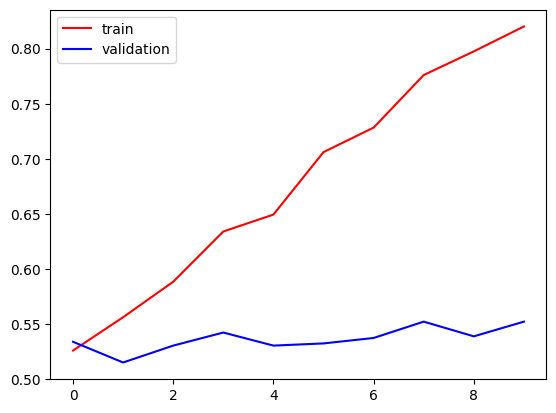

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**With Batch norm and Dropout**

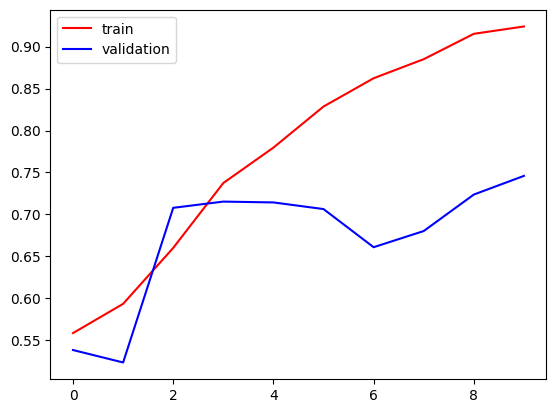

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Loss - withou batch norm and dropout**

1. Training data - Decreasing - model fits training set
2. Validation - Overfits (stays high, increases - model struggles with unseen data)

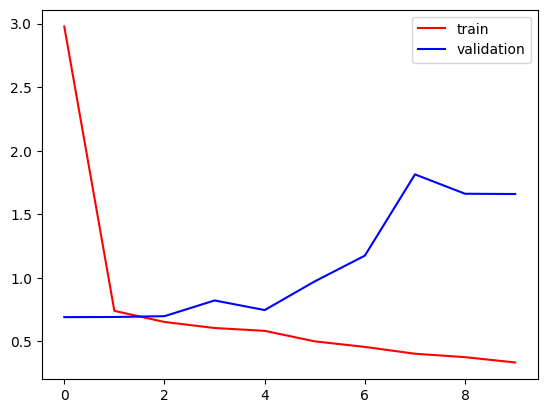

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Loss - with batch norm and dropout**

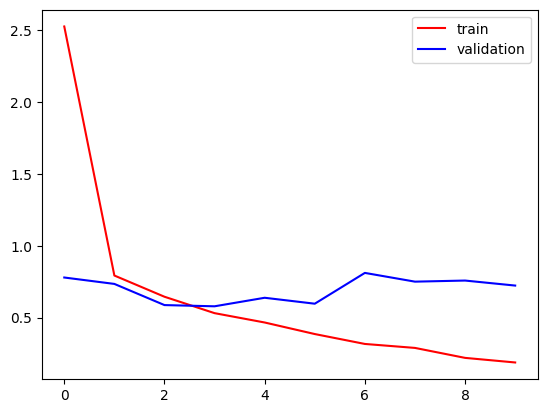

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Ways to reduce overfitting

1. add more data
2. Data augmentation
3. L1/L2 regularization
4. Dropout
5. Batch Normalization
6. Reduce complexity

In [35]:
!ls /content


cat-and-dog.zip  cat_dog_dataset  kaggle.json  sample_data


In [36]:
!zip -r dogs-vs-cats_classifier.zip \
/content/dogs-vs-cats_classifier.ipynb \
/content/cat_dog_dataset \
/content/kaggle.json


Streaming output truncated to the last 5000 lines.
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.2115.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.3438.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.429.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.316.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.3946.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.1832.jpg (deflated 0%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.825.jpg (deflated 0%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.1821.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.3353.jpg (deflated 1%)
  adding: content/cat_dog_dataset/training_set/training_set/cats/cat.456.jpg (deflated 1%)
  adding: content/cat_dog_dataset

In [37]:
from google.colab import files
files.download("dogs-vs-cats_classifier.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Prediction**

In [38]:
import cv2

In [39]:
test_imag = cv2.imread('/content/Cat.jpg')

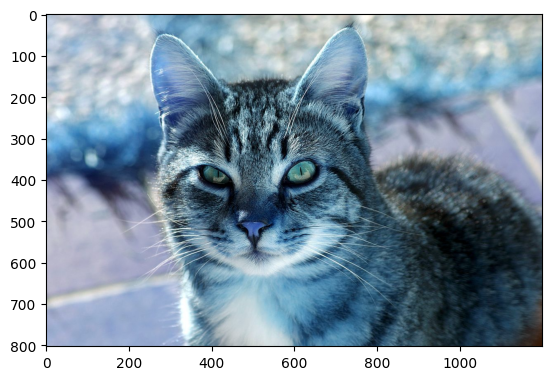

In [41]:
plt.imshow(test_imag)

In [42]:
test_imag.shape

(803, 1200, 3)

In [43]:
test_imag = cv2.resize(test_imag,(256,256))

In [44]:
test_input = test_imag.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.52755016]], dtype=float32)